In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [3]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [91]:
temp, depth, date = load_time_series('test/test_1.nc')
df_0806 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_08_06.csv')
df_0706 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_07_06.csv')
df_0607 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_07.csv')
df_0608 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_08.csv')
df_0606 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_06.csv')
df_0506 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_05_06.csv')
df_0605 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_05.csv')
df_0706_n = load_SHDR_fit('SHDR_trials/test_1_07_06.csv')
df_0607_n = load_SHDR_fit('SHDR_trials/test_1_06_07.csv')
df_0707_n = load_SHDR_fit('SHDR_trials/test_1_07_07.csv')
df_0607_r = load_SHDR_fit('SHDR_trials/test_1_red_relaxed_cont_06_07.csv')
df_0607_b5 = load_SHDR_fit('SHDR_trials/test_1_06_07_bias5.csv')

In [92]:
print(mean_and_std(df_0806, 'em'))
print(mean_and_std(df_0706, 'em'))
print(mean_and_std(df_0607, 'em'))
print(mean_and_std(df_0608, 'em'))
print(mean_and_std(df_0606, 'em'))
print(mean_and_std(df_0506, 'em'))
print(mean_and_std(df_0605, 'em'))
print(mean_and_std(df_0706_n, 'em'))
print(mean_and_std(df_0607_n, 'em'))
print(mean_and_std(df_0707_n, 'em'))
print(mean_and_std(df_0607_r, 'em'))
print(mean_and_std(df_0607_b5, 'em'))

(0.07341455087896503, 0.02693242816340802)
(0.07335499820692212, 0.026835571401447857)
(0.0730297023504201, 0.026120068423577978)
(0.07354449436682647, 0.027012944583014155)
(0.07346350025373738, 0.026738087089860463)
(0.07336479406017136, 0.02620518980511244)
(0.07401932920221568, 0.029005306221697547)
(0.07851616784214795, 0.02961856187591156)
(0.07698728231450064, 0.028510317705931886)
(0.024246018447253027, 0.00954849137954063)
(0.07305014520759633, 0.02618595832241966)
(0.07340286707506309, 0.02607128001906502)


In [93]:
def distance(df_fit, variable, n, value):
    '''Given variable of df_fit, return the locs where the diference between
    slices [n:] - [:-n] in that variable are greater than value.
    '''
    array = df_fit[variable].to_numpy()
    locs = np.where(abs(array[n:] - array[:-n]) > value)[0]
    ratio = len(locs)/len(df_fit)
    return locs, ratio
                    
def n_worst_profiles(df_fit, n):
    em = df_fit['em'].to_numpy()
    indices = np.argpartition(em, -n)[-n:]
    return indices

In [101]:
print(distance(df_0806, 'D1', 1, 5)[1])
print(distance(df_0706, 'D1', 1, 5)[1])
print(distance(df_0607, 'D1', 1, 10)[1])
print(distance(df_0608, 'D1', 1, 5)[1])
print(distance(df_0606, 'D1', 1, 5)[1])
print(distance(df_0506, 'D1', 1, 5)[1])
print(distance(df_0605, 'D1', 1, 5)[1])
print(distance(df_0707_n, 'D1', 1, 5)[1])
print(distance(df_0607_b5, 'D1', 1, 5)[1])

0.036414565826330535
0.03688141923436041
0.0040460628695922814
0.049019607843137254
0.036258948023653904
0.037426081543728604
0.03727046374105197
0.22
0.05010893246187364


In [16]:
len(distance(df_0607, 'D1', 1, 5)[0])

386

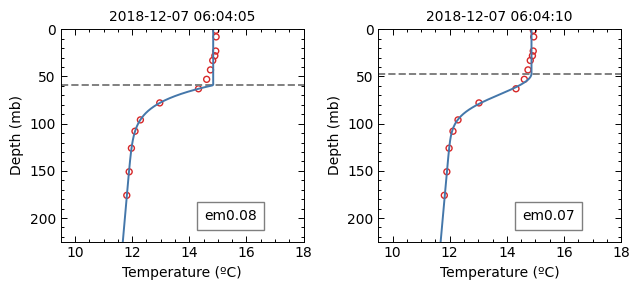

             b2        c2        b3
10129  0.054281  0.000317 -0.002898
10130  0.000325  0.001063 -0.002972


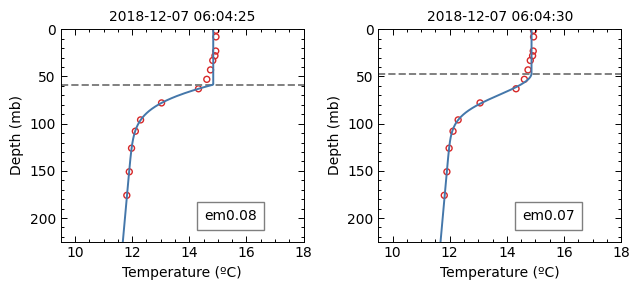

                 b2        c2        b3
10133  4.529635e-02  0.000504 -0.002972
10134  1.136888e-16  0.001007 -0.002972


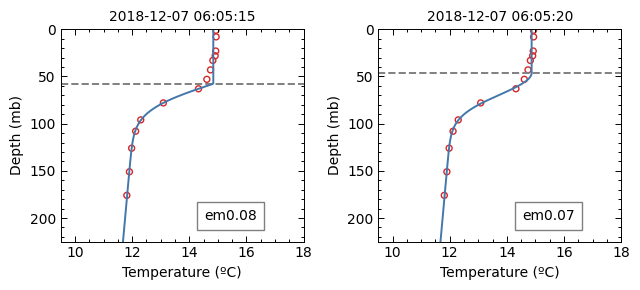

             b2        c2        b3
10143  0.035846  0.000678 -0.002972
10144  0.000000  0.000969 -0.002972


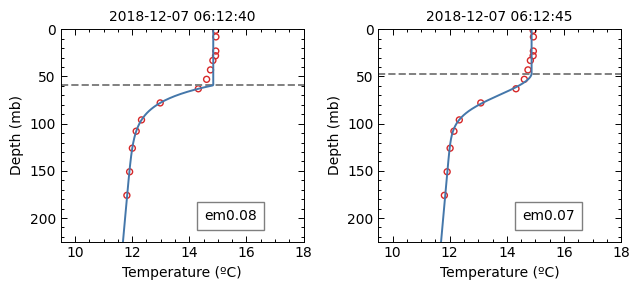

             b2        c2        b3
10232  0.057873  0.000136 -0.002972
10233  0.002026  0.000962 -0.002972


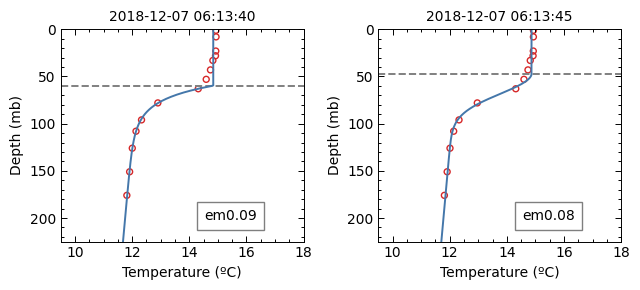

             b2            c2        b3
10244  0.066185  1.556143e-19 -0.002972
10245  0.001594  1.103109e-03 -0.002972


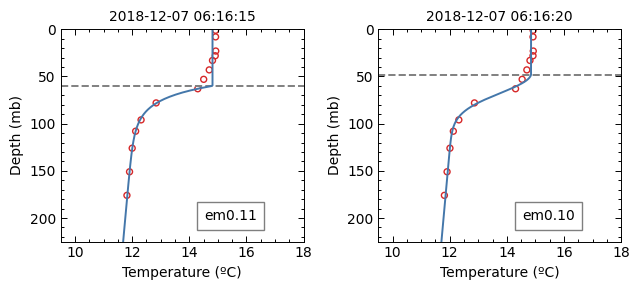

             b2            c2        b3
10275  0.070453  3.190214e-19 -0.002972
10276  0.001604  1.201458e-03 -0.002972


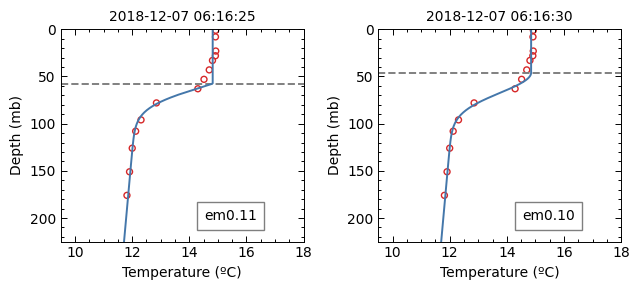

             b2        c2        b3
10277  0.038098  0.001063 -0.002972
10278  0.000004  0.001128 -0.002972


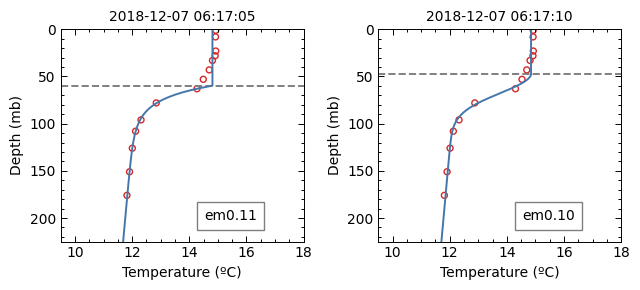

             b2        c2        b3
10285  0.069477  0.000000 -0.002972
10286  0.002060  0.001156 -0.002972


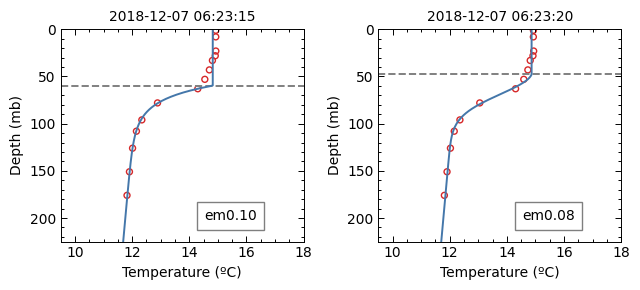

             b2            c2        b3
10359  0.066176  5.591447e-23 -0.002972
10360  0.003879  9.413191e-04 -0.002972


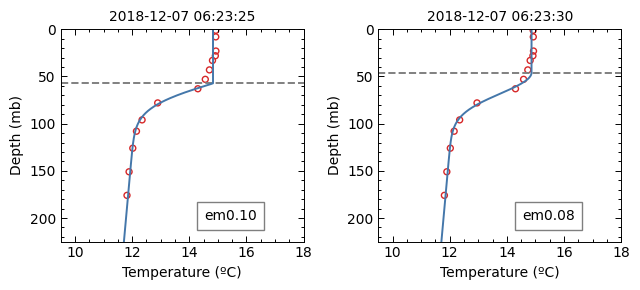

             b2        c2        b3
10361  0.039966  0.000755 -0.002972
10362  0.000000  0.001035 -0.002972


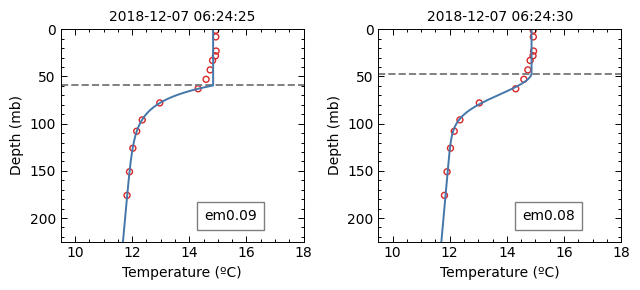

             b2        c2        b3
10373  0.061306  0.000000 -0.002972
10374  0.002933  0.000973 -0.002972


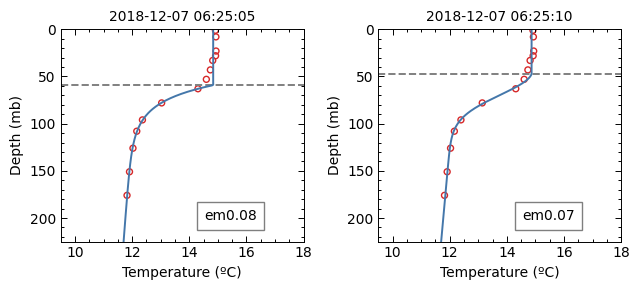

             b2        c2        b3
10381  0.055784  0.000000 -0.002504
10382  0.003678  0.000848 -0.002972


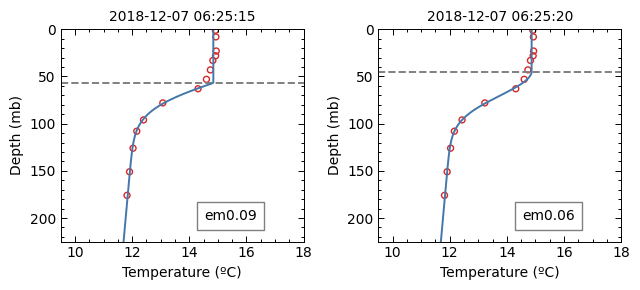

             b2        c2        b3
10383  0.035152  0.000547 -0.002972
10384  0.001349  0.000755 -0.002972


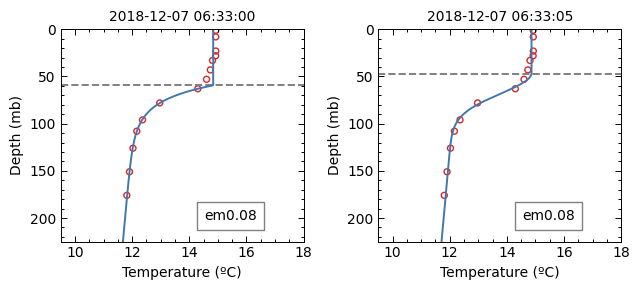

             b2        c2        b3
10476  0.060674  0.000000 -0.002972
10477  0.002427  0.001035 -0.002972


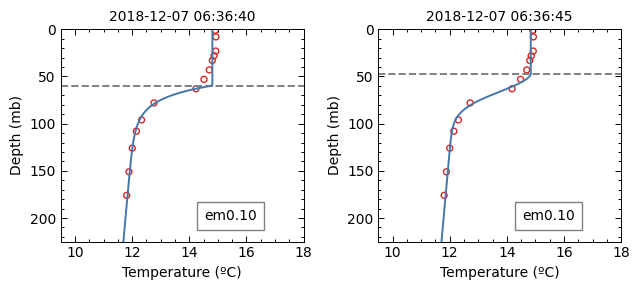

             b2            c2        b3
10520  0.073077  5.300522e-19 -0.002972
10521  0.004102  1.277983e-03 -0.002972


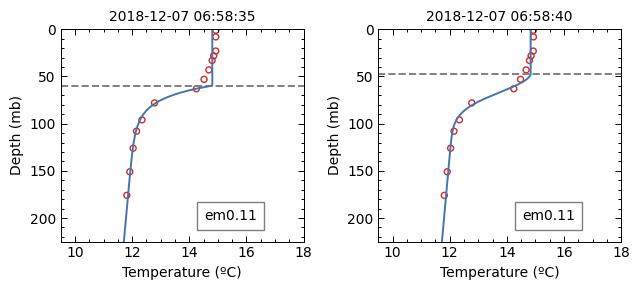

             b2            c2        b3
10783  0.073232  2.846355e-18 -0.002972
10784  0.003232  1.237659e-03 -0.002972


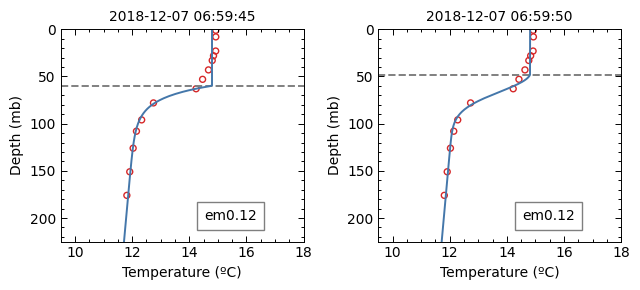

             b2        c2        b3
10797  0.076831  0.000000 -0.002972
10798  0.003435  0.001294 -0.002972


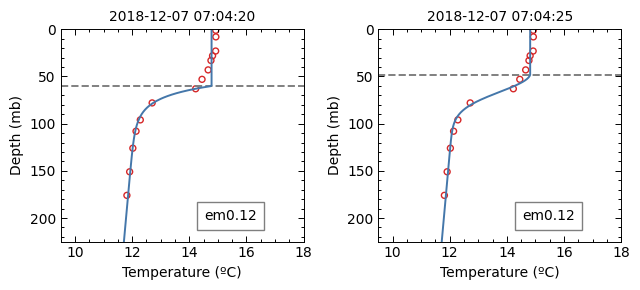

             b2            c2        b3
10852  0.082538  4.029931e-20 -0.002972
10853  0.002228  1.376922e-03 -0.002972


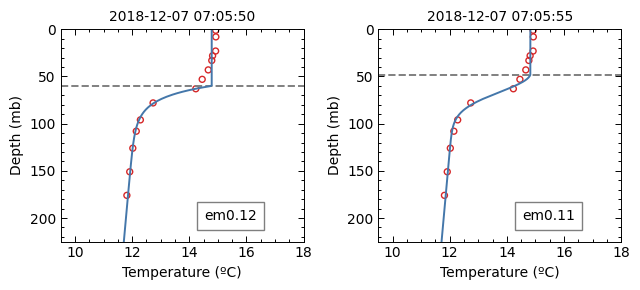

             b2            c2        b3
10870  0.079166  1.031651e-19 -0.002972
10871  0.002526  1.329027e-03 -0.002972


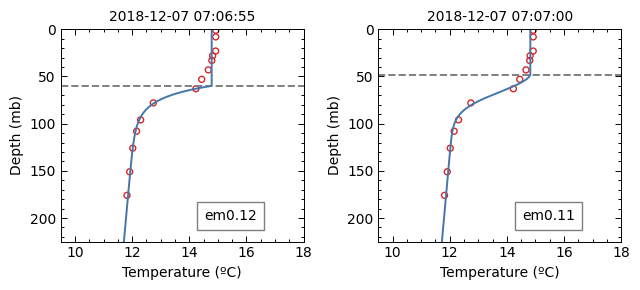

             b2        c2        b3
10883  0.078237  0.000000 -0.002972
10884  0.003444  0.001292 -0.002972


In [102]:
for i in distance(df_0607_b5, 'D1', 1, 10)[0][-20:]:
    plot_multiple_profiles(df_0607_b5, temp, depth, [i, i+1])
    print(df_0607_b5.loc[[i, i+1], ['b2', 'c2', 'b3']])

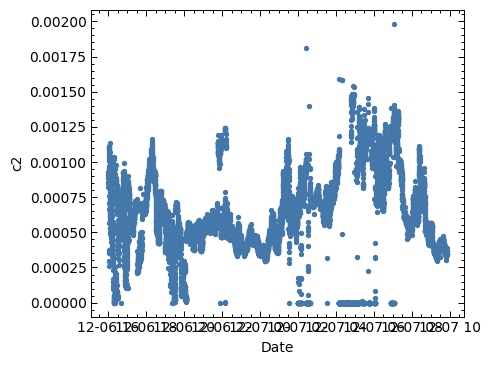

In [19]:
plot_fit_variable(df_0607, 'c2')

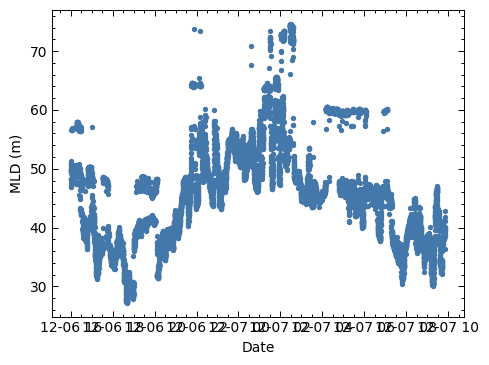

In [78]:
plot_fit_variable(df_0607, 'D1')

In [52]:
from numba import njit

In [60]:
@njit
def sum(x, y, z=None):
    sum = x + y
    if z is not None:
        print('im here')
        sum += z
    return sum

In [61]:
print(sum(1, 2))

3


In [85]:
for i in distance(df_0707_n, 'D1', 1, 10)[0]:
    plot_multiple_profiles(df_0707_n, temp, depth, (i, i+1))

In [ ]:
locs_3 = n_worst_profiles(df_07)